## Liyu Cao STAT 201A MC_homework

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Q1

##### a）

In [2]:
P = np.array([[0.2,0.7,0.1],[0.2,0.5,0.3],[0.2,0.4,0.4]])
P

array([[0.2, 0.7, 0.1],
       [0.2, 0.5, 0.3],
       [0.2, 0.4, 0.4]])

##### b)

In [3]:
X0 = np.array([1,0,0]).reshape(-1,1)
pi_1 = (X0.T @ P).flatten()
X1 = np.random.choice([1,2,3],p=pi_1)

In [4]:
X1

1

### Q2

##### a) 
How to solve this numerically

![3.png](3.png)

We should use least square method to solve this problem, with our constraints added to it.???    
SHOULD WE USE LEAST SQUARE???

In [5]:
# Calculate transpose of P
P_transpose = P.T

# Create the coefficient matrix for the equation (P.T - I)
coeff_matrix = P_transpose - np.eye(P.shape[0])  # np.eye creates an identity matrix of appropriate size

# Add an additional equation for the sum of elements to be 1
additional_eq = np.ones(P.shape[0])
coeff_matrix = np.vstack((coeff_matrix, additional_eq))

# Create a new vector with zeros and 1 at the end for the sum equation
b = np.zeros(P.shape[0])
b = np.append(b, 1)

# Solve the augmented equation (P.T - I) * PI_inf = [0, 0, 0, ..., 0, 1] for PI_inf using numpy.linalg.solve
# PI_inf = np.linalg.solve(coeff_matrix, b) # not square matrix'

x, residuals, _, _ = np.linalg.lstsq(coeff_matrix, b, rcond=None)

print("Steady-state distribution (PI_inf):", x)

Steady-state distribution (PI_inf): [0.2        0.51111111 0.28888889]


The anwser is just the same as my theoretical solutions

##### b)

In [6]:
X0 = np.array([1,0,0]).reshape(-1,1)
def generate_pi(X0, P, t):
    X = X0
    for i in range(1,t+1):
        Xi = (X.T @ P).T
        X = Xi
    return X

In [7]:
generate_pi(X0,P,10)  #After 10 iterations, they are almost the same

array([[0.2       ],
       [0.51111111],
       [0.28888889]])

Plot

In [8]:
def distribution_dist(Xi,X0):
    def norm2_square(x):
        return np.sum(x**2)
    return norm2_square(Xi-X0)

In [9]:
Pi_inf = x.reshape(-1,1)

In [10]:
Pi_inf

array([[0.2       ],
       [0.51111111],
       [0.28888889]])

In [11]:
i_list = range(1,10+1)
X0_1 = np.array([1,0,0]).reshape(-1,1)
X0_2 = np.array([0,1,0]).reshape(-1,1)
X0_3 = np.array([0,0,1]).reshape(-1,1)

In [12]:
Xlist_1 = [generate_pi(X0_1,P,t) for t in i_list]
dist_1 = [distribution_dist(xi,Pi_inf) for xi in Xlist_1]
Xlist_2 = [generate_pi(X0_2,P,t) for t in i_list]
dist_2 = [distribution_dist(xi,Pi_inf) for xi in Xlist_2]
Xlist_3 = [generate_pi(X0_3,P,t) for t in i_list]
dist_3 = [distribution_dist(xi,Pi_inf) for xi in Xlist_3]

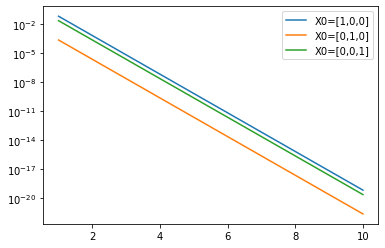

In [13]:
plt.plot(i_list,dist_1,label='X0=[1,0,0]')
plt.plot(i_list,dist_2,label='X0=[0,1,0]')
plt.plot(i_list,dist_3,label='X0=[0,0,1]')
plt.yscale('log')
plt.legend()
plt.show()

### Q3

##### a)

In [14]:
P = np.array([[0.2,0.7,0.1],[0.2,0.5,0.3],[0.2,0.4,0.4]])
def next_Xi(Xi, P):
    pi = P[Xi-1]
    return np.random.choice([1,2,3],p=pi)

In [15]:
def simulate_arrivaltime(X0,P):
    X = X0
    t = 0
    while X != 3:
        t += 1
        X_t_1 = next_Xi(X,P)
        X = X_t_1
    return t

In [16]:
simulate_arrivaltime(1,P)

3

In [17]:
at_1 = []
at_2 = []
for i in range(1000):
    at_1.append(simulate_arrivaltime(1,P))
    at_2.append(simulate_arrivaltime(2,P))

(array([344., 175., 116.,  91.,  68.,  45.,  72.,  23.,  13.,   9.,  12.,
          3.,   9.,   7.,   4.,   2.,   1.,   2.,   1.,   3.]),
 array([ 1.  ,  2.15,  3.3 ,  4.45,  5.6 ,  6.75,  7.9 ,  9.05, 10.2 ,
        11.35, 12.5 , 13.65, 14.8 , 15.95, 17.1 , 18.25, 19.4 , 20.55,
        21.7 , 22.85, 24.  ]),
 <BarContainer object of 20 artists>)

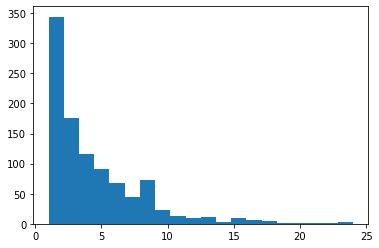

In [18]:
plt.hist(at_1,bins=20)

(array([476., 136., 156.,  57.,  47.,  49.,  15.,  30.,   8.,   6.,  12.,
          1.,   4.,   0.,   0.,   0.,   1.,   1.,   0.,   1.]),
 array([ 1. ,  2.4,  3.8,  5.2,  6.6,  8. ,  9.4, 10.8, 12.2, 13.6, 15. ,
        16.4, 17.8, 19.2, 20.6, 22. , 23.4, 24.8, 26.2, 27.6, 29. ]),
 <BarContainer object of 20 artists>)

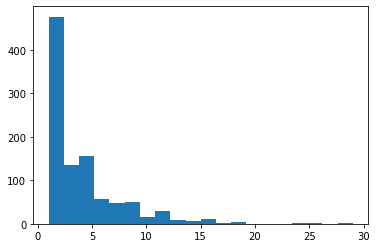

In [19]:
plt.hist(at_2,bins=20)

In [20]:
print("Average arriving time of X0=1 is:",np.mean(at_1))
print("Average arriving time of X0=2 is:",np.mean(at_2))

Average arriving time of X0=1 is: 4.555
Average arriving time of X0=2 is: 3.851


##### b)
Theoretically, we get the $\mu_1$ and $\mu_2$ below

![4.png](4.png)

In [21]:
mu1 = 60/13
mu2 = 50/13
print("Theoretically, average arriving time of X0=1 is:",mu1)
print("Theoretically, average arriving time of X0=2 is:",mu2)
print("Average arriving time of X0=1 is:",np.mean(at_1))
print("Average arriving time of X0=2 is:",np.mean(at_2))

Theoretically, average arriving time of X0=1 is: 4.615384615384615
Theoretically, average arriving time of X0=2 is: 3.8461538461538463
Average arriving time of X0=1 is: 4.555
Average arriving time of X0=2 is: 3.851


As we use larger simulation number, these two numbers get closer

In [22]:
at_1 = []
at_2 = []
for i in range(5000):
    at_1.append(simulate_arrivaltime(1,P))
    at_2.append(simulate_arrivaltime(2,P))
print("Theoretically, average arriving time of X0=1 is:",mu1)
print("Theoretically, average arriving time of X0=2 is:",mu2)
print("Average arriving time of X0=1 is:",np.mean(at_1))
print("Average arriving time of X0=2 is:",np.mean(at_2))

Theoretically, average arriving time of X0=1 is: 4.615384615384615
Theoretically, average arriving time of X0=2 is: 3.8461538461538463
Average arriving time of X0=1 is: 4.6798
Average arriving time of X0=2 is: 3.7526
